In [3]:
import importlib
import residence
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
house_ids = residence.all_data['dataid'].unique()

In [5]:
metadata = residence.get_metadata()
metadata[metadata['dataid'].isin(house_ids)][['city', 'state']].groupby(
    by=['city', 'state']
).size()

city          state     
Austin        Texas         24
Brooktondale  New York       2
Groton        New York       1
Ithaca        New York      17
Lansing       New York       1
San Diego     California    22
Trumansburg   New York       3
dtype: int64

In [ ]:
for id in house_ids:
    r = residence.Residence(_id=id)
    city, state = metadata[metadata['dataid'] == id][['city', 'state']].iloc[0].tolist()
    print(f"""{id}: {city}, {state
        } {r.meterage60['localminute'].min()}, {r.meterage60['localminute'].max()}""")
    fig, axes = r.plot_overview()
    fig.savefig(f'figures/preview/preview_{id}_{city}_{state}.png', dpi=300, bbox_inches='tight')
    plt.close(fig)

27: Brooktondale, New York 2019-05-01 01:00:00, 2019-11-01 00:00:00
142: Trumansburg, New York 2019-05-01 01:00:00, 2019-11-01 00:00:00
387: Ithaca, New York 2019-05-01 01:00:00, 2019-11-01 00:00:00
558: Ithaca, New York 2019-05-01 01:00:00, 2019-11-01 00:00:00
914: Ithaca, New York 2019-05-01 01:00:00, 2019-11-01 00:00:00
950: Ithaca, New York 2019-05-01 01:00:00, 2019-11-01 00:00:00
1222: Ithaca, New York 2019-05-01 01:00:00, 2019-11-01 00:00:00
1240: Groton, New York 2019-05-01 01:00:00, 2019-11-01 00:00:00
1417: Ithaca, New York 2019-05-01 01:00:00, 2019-11-01 00:00:00
2096: Ithaca, New York 2019-05-01 01:00:00, 2019-11-01 00:00:00
2318: Trumansburg, New York 2019-05-01 01:00:00, 2019-11-01 00:00:00
2358: Brooktondale, New York 2019-05-01 01:00:00, 2019-11-01 00:00:00
3000: Ithaca, New York 2019-05-01 01:00:00, 2019-11-01 00:00:00
3488: Ithaca, New York 2019-05-01 01:00:00, 2019-11-01 00:00:00
3517: Ithaca, New York 2019-05-01 01:00:00, 2019-11-01 00:00:00
3700: Ithaca, New York 20

In [45]:
weather_df = pd.read_csv('../weather/Ithaca_NY_2019.csv', skiprows=2)
weather_df = weather_df.loc[:, ~weather_df.columns.str.startswith('Unnamed')]
weather_df = weather_df.drop(columns=['1'], errors='ignore')
weather_df['local_minute'] = weather_df.apply(
    lambda row: pd.Timestamp(year=row['Year'].astype(int), month=row['Month'].astype(int), day=row['Day'].astype(int), hour=row['Hour'].astype(int)),
    axis=1
)
weather_df.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute'], inplace=True)
weather_df['hoy'] = np.arange(1, len(weather_df) + 1)
cols = ['hoy', 'local_minute'] + [col for col in weather_df.columns if col not in ['hoy', 'local_minute']]
weather_df = weather_df[cols]
weather_df

,hoy,local_minute,Dew Point,GHI,Temperature,Wind Direction,Surface Albedo,DHI,DNI,Pressure,Wind Speed
0,1,2019-01-01 00:00:00,3.8,0,5.2,192,0.12,0,0,976,1.6
1,2,2019-01-01 01:00:00,4.6,0,5.9,203,0.12,0,0,975,1.4
2,3,2019-01-01 02:00:00,5.7,0,7.0,217,0.12,0,0,974,1.4
3,4,2019-01-01 03:00:00,7.1,0,8.3,237,0.12,0,0,975,1.4
4,5,2019-01-01 04:00:00,7.9,0,8.8,255,0.12,0,0,976,1.6
...,...,...,...,...,...,...,...,...,...,...,...
8755,8756,2019-12-31 19:00:00,1.2,0,2.8,162,0.12,0,0,984,1.8
8756,8757,2019-12-31 20:00:00,1.8,0,3.3,169,0.12,0,0,982,1.9
8757,8758,2019-12-31 21:00:00,2.3,0,3.7,174,0.12,0,0,980,1.9
8758,8759,2019-12-31 22:00:00,2.7,0,4.2,181,0.12,0,0,979,1.9


In [44]:
weather_df['local_minute'].dt.day_of_year

0         1
1         1
2         1
3         1
4         1
       ... 
8755    365
8756    365
8757    365
8758    365
8759    365
Name: local_minute, Length: 8760, dtype: int32

In [10]:
r = residence.Residence(9922)

In [33]:
r.meterage60_grouped['HeatingCooling']

0       0.00000
1       0.00000
2       0.00000
3       0.00000
4       0.00000
         ...   
8755    0.00350
8756    0.00325
8757    0.00600
8758    0.00300
8759    0.00150
Name: HeatingCooling, Length: 8760, dtype: float64

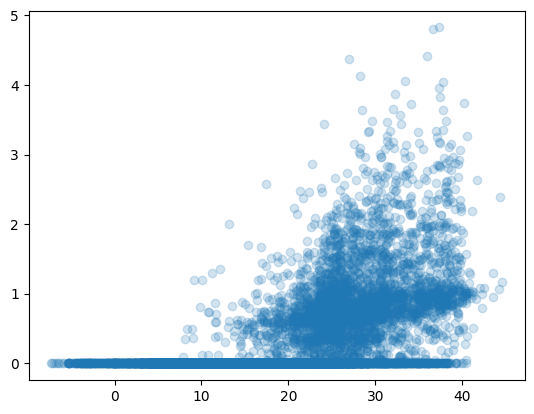

In [ ]:
mapper = residence.get_weather()
mapper('Austin', 2018)

merged = r.meterage60_grouped.merge(mapper('Austin', 2018), left_on='localminute', right_on='local_minute', how='left')

plt.scatter(merged['Temperature'], merged['HeatingCooling'], alpha=0.2)

In [35]:


survey = residence.all_survey
survey[survey.dataid == 9922].iloc[0].to_dict()

IndexError: single positional indexer is out-of-bounds

In [45]:
survey['dataid'].isin(house_ids)

1      True
8      True
20     True
22     True
28     True
30     True
73     True
84     True
104    True
117    True
119    True
125    True
16     True
38     True
44     True
57     True
71     True
75     True
154    True
90     True
Name: dataid, dtype: bool

In [51]:
np.isin(house_ids, residence.read_survey()[0])

array([ True, False,  True, False,  True,  True,  True,  True,  True,
       False, False, False, False,  True, False, False,  True, False,
       False,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True, False,  True,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [56]:
metadata.columns.tolist()

['dataid',
 'active_record',
 'building_type',
 'program_579',
 'program_baseline',
 'program_energy_internet_demo',
 'program_lg_appliance',
 'program_verizon',
 'program_ccet_group',
 'program_civita_group',
 'program_shines',
 'city',
 'state',
 'pv',
 'pv_panel_direction',
 'total_amount_of_pv',
 'amount_of_south_facing_pv',
 'amount_of_west_facing_pv',
 'amount_of_east_facing_pv',
 'date_enrolled',
 'date_withdrawn',
 'house_construction_year',
 'total_square_footage',
 'first_floor_square_footage',
 'second_floor_square_footage',
 'third_floor_square_footage',
 'half_floor_square_footage',
 'lower_level_square_footage',
 'audit_2011',
 'audit_2013_2014',
 'survey_2011',
 'survey_2012',
 'survey_2013',
 'survey_2014',
 'survey_2017',
 'survey_2019',
 'number_of_nests',
 'indoor_temp_min_time',
 'indoor_temp_max_time',
 'indoor_temp_data_availability',
 'gas_ert_min_time',
 'gas_ert_max_time',
 'gas_data_availability',
 'water_ert_min_time',
 'water_ert_max_time',
 'water_data_avai

In [63]:
has_survey = metadata[metadata[['audit_2011', 'audit_2013_2014', 'survey_2011',
 'survey_2012',
 'survey_2013',
 'survey_2014',
 'survey_2017',
 'survey_2019']].any(axis=1)]['dataid']


has_survey[has_survey.isin(house_ids)]

38      9160
45      7536
51       661
56      1642
62      2335
66      2818
69      3039
70      3456
75      4031
81      4767
137     7951
192     9019
222     5746
225     6139
249     9922
319     3538
325     4373
343     7800
349     8386
386     9278
983     5938
986     3938
987     8061
999     8574
1000    7114
1002    7062
1003    8733
1005    9775
1011    4495
1056    2606
1076    1731
1077    8342
1086    4934
1146    9836
1189    9612
1236    1524
1237    7719
1480    5058
1491    3996
1503     950
1505     914
1507      27
1508    5587
1509    5679
1523    3488
1536    5997
1542     387
1543    1240
1575    1222
Name: dataid, dtype: int64

In [6]:
dataids = []
for year in [2011, 2012, 2013, 2014, 2017, 2019]:
    s = pd.read_csv(f'../data/audits_and_surveys/survey_{year}_all_participants.csv')
    s['dataid'] = s['dataid'].astype(str).str.replace('\ufeff', '', regex=False)
    dataids += s['dataid'].unique().tolist()
dataids_r = np.unique(dataids)
dataids = []
for id in dataids_r:
    try:
        id = int(eval(id))
        dataids.append(id)
    
    except:
        pass

In [7]:
survey_2011 = pd.read_csv(f'../data/audits_and_surveys/survey_2011_all_participants.csv')
survey_2011['dataid'] = survey_2011['dataid'].astype(str).str.replace('\ufeff', '', regex=False).astype(int)
survey_2011['occupants'] = survey_2011[['age_under_5', 'age_6_to_12', 'age_13_to_18', 'age_19_to_24',
  'age_25_to_34', 'age_35_to_49', 'age_50_to64', 'age_over_65']].sum(axis=1).astype(int)


In [8]:
survey_2011['air_conditioner_type'].value_counts()

air_conditioner_type
Split system with gas furnace    222
Heat Pump                         21
Mini-split system                  7
Geothermal heat pump               1
Name: count, dtype: int64

In [9]:
survey_2012 = pd.read_csv(f'../data/audits_and_surveys/survey_2012_all_participants.csv')
survey_2012.dropna(subset=['dataid'], inplace=True)
for col in ['num_age_5_and_under', 'num_age_6_to_12', 'num_age_13_to_18', 'num_age_19_to_24',
                                        'num_age_25_to_34', 'num_age_35_to_49', 'num_age_50_to_64', 'num_age_65_and_older']:
    cc = survey_2012[col].fillna(0)
    survey_2012[col] = cc.astype(int)
survey_2012['dataid'] = survey_2012['dataid'].astype(str).str.replace('\ufeff', '', regex=False).apply(lambda x: int(eval(x))).astype(int)
survey_2012['occupants'] = survey_2012[['num_age_5_and_under', 'num_age_6_to_12', 'num_age_13_to_18', 'num_age_19_to_24',
                                        'num_age_25_to_34', 'num_age_35_to_49', 'num_age_50_to_64', 'num_age_65_and_older']
].astype(int).sum(axis=1).astype(int)

In [10]:
survey_2012['hvac_system'].value_counts()

hvac_system
Split system with gas furnace                      133
Conventional split system with electric heating     12
I don't know                                         9
Heat Pump                                            6
Name: count, dtype: int64

In [11]:
survey_2013 = pd.read_csv(f'../data/audits_and_surveys/survey_2013_all_participants.csv')
survey_2013.dropna(subset=['dataid'], inplace=True)
survey_2013['dataid'] = survey_2013['dataid'].astype(int)
for col in ['residents_under_5', 'residents_6_to_12', 'residents_13_to_18', 'residents_19_to_24',
            'residents_25_to_34', 'residents_35_to_49', 'residents_50_to_64', 'residents_older_65']:
    cc = survey_2013[col].fillna(0)
    survey_2013[col] = cc.astype(int)
survey_2013['occupants'] = survey_2013[['residents_under_5', 'residents_6_to_12', 'residents_13_to_18', 'residents_19_to_24',
            'residents_25_to_34', 'residents_35_to_49', 'residents_50_to_64', 'residents_older_65']].sum(axis=1).astype(int)

In [12]:
survey_2013['hvac_system'] = survey_2013[['hvac_central_air_gas_furnace', 'hvac_central_air_electric_furnace', 'hvac_twoway_heat_pump', 'hvac_geothermal_heat_pump', 'hvac_window_ac', 'hvac_ductless', 'hvac_no_ac', 'hvac_dont_know']].apply(
    lambda row: ', '.join([str(x) for x in row if pd.notna(x)]), axis=1
)
survey_2013['hvac_system'].value_counts()

hvac_system
Split system with gas furnace                                                         232
Central air system with electric heating                                               23
Heat Pump                                                                              18
I dont know                                                                            15
Split system with gas furnace, Heat Pump                                                8
Central air system with electric heating, Heat Pump                                     4
                                                                                        3
Geothermal heat pump                                                                    3
Split system with gas furnace, Central air system with electric heating                 2
Heat Pump, Window unit                                                                  2
Central air system with electric heating, Heat Pump, Window unit                        

In [18]:
survey_2014 = pd.read_csv(f'../data/audits_and_surveys/survey_2014_all_participants.csv')
survey_2014.dropna(subset=['dataid'], inplace=True)
survey_2014['dataid'] = survey_2014['dataid'].astype(int)
for col in ['residents_under_5', 'residents_6_to_12', 'residents_13_to_18', 'residents_19_to_24', 'residents_25_to_34', 'residents_35_to_49', 'residents_50_to_64', 'residents_65_and_older']:
    cc = survey_2014[col].fillna(0)
    survey_2014[col] = cc.astype(int)
survey_2014['occupants'] = survey_2014[['residents_under_5', 'residents_6_to_12', 'residents_13_to_18', 'residents_19_to_24', 'residents_25_to_34', 'residents_35_to_49', 'residents_50_to_64', 'residents_65_and_older']].sum(axis=1).astype(int)

In [19]:
survey_2014['hvac_system'] = survey_2014[['hvac_central_air_gas_furnace', 'hvac_central_air_electric_furnace', 'hvac_twoway_heat_pump', 'hvac_geothermal_heat_pump', 'hvac_window_ac', 'hvac_ductless', 'hvac_no_ac', 'hvac_dont_know']].apply(
    lambda row: ', '.join([str(x) for x in row if pd.notna(x)]), axis=1
)
survey_2014['hvac_system'].value_counts()

hvac_system
Split system with gas furnace                                              220
                                                                            35
Central air system with electric heating                                    24
Heat Pump                                                                   14
Split system with gas furnace, Window unit                                   7
No air conditioning                                                          6
Window unit                                                                  4
"""I don't know"""                                                           3
Split system with gas furnace, Central air system with electric heating      3
Split system with gas furnace, Heat Pump                                     2
Split system with gas furnace, No air conditioning                           2
Central air system with electric heating, Heat Pump                          2
Geothermal heat pump                    

In [24]:
survey_2017 = pd.read_csv(f'../data/audits_and_surveys/survey_2017_all_participants.csv')
survey_2017.dropna(subset=['dataid'], inplace=True)
survey_2017['dataid'] = survey_2017['dataid'].astype(str).str.replace('\ufeff', '', regex=False).astype(int)
for col in ['residents_under_5', 'residents_6_to_12', 'residents_13_to_18', 'residents_19_to_24', 'residents_25_to_34', 'residents_35_to_49', 'residents_50_to_64', 'residents_65_and_older']:
    cc = survey_2017[col].fillna(0)
    survey_2017[col] = cc.astype(int)
survey_2017['occupants'] = survey_2017[['residents_under_5', 'residents_6_to_12', 'residents_13_to_18', 'residents_19_to_24', 'residents_25_to_34', 'residents_35_to_49', 'residents_50_to_64', 'residents_65_and_older']].sum(axis=1).astype(int)

In [22]:
survey_2017['hvac_system'] = survey_2017[['hvac_central_air_gas_furnace', 'hvac_central_air_electric_heating', 'heat_pump_split', 'hvac_geothermal_heat_pump', 'hvac_window_unit_ac', 'hvac_ductless_minisplit', 'hvac_no_ans'
]].apply(
    lambda row: ', '.join([str(x) for x in row if pd.notna(x)]), axis=1
)
survey_2017['hvac_system'].value_counts()



hvac_system
Split system with gas furnace                                              175
Central air system with electric heating                                    21
                                                                            20
Heat Pump                                                                   12
Split system with gas furnace, Window unit                                   4
Central air system with electric heating, Heat Pump                          4
Heat Pump, Window unit                                                       2
Geothermal heat pump                                                         2
I don't know                                                                 2
Split system with gas furnace, Heat Pump                                     2
Split system with gas furnace, Heat Pump, Mini-split system                  2
Split system with gas furnace, Heat Pump, I don't know                       1
Window unit                             

In [25]:
survey_2019 = pd.read_csv(f'../data/audits_and_surveys/survey_2019_all_participants.csv')
survey_2019.dropna(subset=['dataid'], inplace=True)
survey_2019['dataid'] = survey_2019['dataid'].astype(str).str.replace('\ufeff', '', regex=False).astype(int)
for col in ['residents_under_5', 'residents_6_to_12', 'residents_13_to_18', 'residents_19_to_24', 'residents_25_to_34', 'residents_35_to_49', 'residents_50_to_64', 'residents_65_and_older']:
    cc = survey_2017[col].fillna(0)
    survey_2017[col] = cc.astype(int)
survey_2019['occupants'] = survey_2019[['residents_under_5', 'residents_6_to_12', 'residents_13_to_18', 'residents_19_to_24', 'residents_25_to_34', 'residents_35_to_49', 'residents_50_to_64', 'residents_65_and_older']].sum(axis=1).astype(int)

In [27]:
survey_2019['hvac_system'] = survey_2019[['hvac_central_air_gas_furnace', 'hvac_central_air_electric_heating', 'heat_pump_split', 'hvac_geothermal_heat_pump', 'hvac_window_unit_ac', 'hvac_ductless_minisplit', 'no_hvac', 'hvac_dont_know'
]].apply(
    lambda row: ', '.join([str(x) for x in row if pd.notna(x)]), axis=1
)
survey_2019['hvac_system'].value_counts()



hvac_system
Split system with gas furnace                                                                    123
No air conditioning                                                                               14
Heat Pump                                                                                         13
Split system with gas furnace, No air conditioning                                                10
Central air system with electric heating                                                          10
Geothermal heat pump                                                                               5
Split system with gas furnace, Mini-split system                                                   4
Mini-split system                                                                                  4
Split system with gas furnace, Central air system with electric heating                            3
Split system with gas furnace, Window unit                                     